# Getis ORD con humanos

## Preprocesado de los datos humanos

In [10]:
import pandas as pd
#%pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
#%pip install libpysal
from libpysal.weights import Queen, KNN
#%pip install esda
from esda.getisord import G_Local    

In [11]:
df = pd.read_csv("../backend/data/humans.csv")
print(df.head())
print(df.columns)

  Record ID Data Access Group  \
0         1  HU Ramón y Cajal   
1         2  HU Ramón y Cajal   
2         4  HU Ramón y Cajal   
3         5  HU Ramón y Cajal   
4         7  HU Ramón y Cajal   

  Sexo del paciente/Has the consent form been signed?  \
0                                        Hombre/Male    
1                                        Hombre/Male    
2                                        Hombre/Male    
3                                        Hombre/Male    
4                                        Hombre/Male    

   Edad del paciente al momento del diagnóstico de este episodio/Patient age at diagnosis (years)  \
0                                               33.0                                                
1                                               78.0                                                
2                                               62.0                                                
3                                               62.0  

In [12]:
df = df[["Provincia de residencia del paciente", "Post Code", "Date"]]
df = df.rename(columns={
    "Provincia de residencia del paciente": "Province",
    "Post Code": "Postcode",
    "Date": "Date of diagnosis"
})

print(df.head(50))

           Province  Postcode Date of diagnosis
0               NaN       NaN        2023-12-30
1            Madrid   28823.0        2023-09-11
2            Madrid   28915.0        2023-05-25
3            Madrid   28690.0               NaN
4               NaN   28043.0        2023-01-12
5         Barcelona    8980.0        2023-04-25
6         Barcelona    8028.0        2023-02-15
7         Barcelona       NaN        2023-05-15
8         Barcelona    8032.0        2023-09-14
9               NaN       NaN        2023-10-25
10        Barcelona       NaN        2023-12-21
11        Barcelona       NaN        2024-05-24
12        Barcelona       NaN        2024-06-15
13        Barcelona    8016.0        2024-02-19
14        Barcelona    8035.0        2020-04-09
15        Barcelona    8035.0        2022-10-07
16        Barcelona    8759.0        2024-01-18
17        Barcelona    8759.0        2021-12-17
18        Barcelona    8759.0        2024-09-22
19        Barcelona    8110.0        202

In [13]:
codigos_postales_provincias = {
    "01": "Álava",
    "02": "Albacete",
    "03": "Alicante",
    "04": "Almería",
    "05": "Ávila",
    "06": "Badajoz",
    "07": "Islas Baleares",
    "08": "Barcelona",
    "09": "Burgos",
    "10": "Cáceres",
    "11": "Cádiz",
    "12": "Castellón",
    "13": "Ciudad Real",
    "14": "Córdoba",
    "15": "A Coruña",
    "16": "Cuenca",
    "17": "Girona",
    "18": "Granada",
    "19": "Guadalajara",
    "20": "Guipúzcoa",
    "21": "Huelva",
    "22": "Huesca",
    "23": "Jaén",
    "24": "León",
    "25": "Lleida",
    "26": "La Rioja",
    "27": "Lugo",
    "28": "Madrid",
    "29": "Málaga",
    "30": "Murcia",
    "31": "Navarra",
    "32": "Ourense",
    "33": "Asturias",
    "34": "Palencia",
    "35": "Las Palmas",
    "36": "Pontevedra",
    "37": "Salamanca",
    "38": "Santa Cruz de Tenerife",
    "39": "Cantabria",
    "40": "Segovia",
    "41": "Sevilla",
    "42": "Soria",
    "43": "Tarragona",
    "44": "Teruel",
    "45": "Toledo",
    "46": "Valencia",
    "47": "Valladolid",
    "48": "Vizcaya",
    "49": "Zamora",
    "50": "Zaragoza",
    "51": "Ceuta",
    "52": "Melilla"
}

In [14]:
# Convertimos a string los códigos postales (evitando los NaN)
df['Postcode'] = df['Postcode'].apply(lambda x: str(int(x)).zfill(5) if pd.notnull(x) else None)

# Ahora podemos aplicar el mapeo para obtener la provincia
df['Province'] = df['Postcode'].str[:2].map(codigos_postales_provincias)

df = df.dropna(subset=['Province', 'Postcode'], how='all')

print(df.head(50))

     Province Postcode Date of diagnosis
1      Madrid    28823        2023-09-11
2      Madrid    28915        2023-05-25
3      Madrid    28690               NaN
4      Madrid    28043        2023-01-12
5   Barcelona    08980        2023-04-25
6   Barcelona    08028        2023-02-15
8   Barcelona    08032        2023-09-14
13  Barcelona    08016        2024-02-19
14  Barcelona    08035        2020-04-09
15  Barcelona    08035        2022-10-07
16  Barcelona    08759        2024-01-18
17  Barcelona    08759        2021-12-17
18  Barcelona    08759        2024-09-22
19  Barcelona    08110        2021-12-02
20  Barcelona    08024        2021-03-03
21  Barcelona    08042        2022-04-26
22  Barcelona    08031        2021-10-04
23  Barcelona    08032        2022-09-19
24  Barcelona    08754        2021-10-07
26  Barcelona    08940        2022-10-10
27  Barcelona    08030        2018-01-04
28  Barcelona    08025        2018-01-08
29  Tarragona    43560        2018-06-14
30  Barcelona   

In [15]:
df['Province'] = df['Postcode'].str[:2].map(codigos_postales_provincias)
print(df.head(50))

     Province Postcode Date of diagnosis
1      Madrid    28823        2023-09-11
2      Madrid    28915        2023-05-25
3      Madrid    28690               NaN
4      Madrid    28043        2023-01-12
5   Barcelona    08980        2023-04-25
6   Barcelona    08028        2023-02-15
8   Barcelona    08032        2023-09-14
13  Barcelona    08016        2024-02-19
14  Barcelona    08035        2020-04-09
15  Barcelona    08035        2022-10-07
16  Barcelona    08759        2024-01-18
17  Barcelona    08759        2021-12-17
18  Barcelona    08759        2024-09-22
19  Barcelona    08110        2021-12-02
20  Barcelona    08024        2021-03-03
21  Barcelona    08042        2022-04-26
22  Barcelona    08031        2021-10-04
23  Barcelona    08032        2022-09-19
24  Barcelona    08754        2021-10-07
26  Barcelona    08940        2022-10-10
27  Barcelona    08030        2018-01-04
28  Barcelona    08025        2018-01-08
29  Tarragona    43560        2018-06-14
30  Barcelona   

In [16]:
df = df.dropna(subset=['Date of diagnosis'], how='any')
print(df.head(50))

     Province Postcode Date of diagnosis
1      Madrid    28823        2023-09-11
2      Madrid    28915        2023-05-25
4      Madrid    28043        2023-01-12
5   Barcelona    08980        2023-04-25
6   Barcelona    08028        2023-02-15
8   Barcelona    08032        2023-09-14
13  Barcelona    08016        2024-02-19
14  Barcelona    08035        2020-04-09
15  Barcelona    08035        2022-10-07
16  Barcelona    08759        2024-01-18
17  Barcelona    08759        2021-12-17
18  Barcelona    08759        2024-09-22
19  Barcelona    08110        2021-12-02
20  Barcelona    08024        2021-03-03
21  Barcelona    08042        2022-04-26
22  Barcelona    08031        2021-10-04
23  Barcelona    08032        2022-09-19
24  Barcelona    08754        2021-10-07
26  Barcelona    08940        2022-10-10
27  Barcelona    08030        2018-01-04
28  Barcelona    08025        2018-01-08
29  Tarragona    43560        2018-06-14
30  Barcelona    08032        2018-10-02
31  Barcelona   

## Aplicacion de GetisOrd

### Forma 1: Aplicar GetisOrd agrupando por provincias

- Se agrupa los casos positivos por provincias y despues se aplica la matriz de pesos vectoriales con las provincias que comparten frontera

In [17]:
# Agrupar por provincia
df_grouped = df.groupby('Province').size().reset_index(name='Count')
# Ordenar por conteo descendente
df_grouped = df_grouped.sort_values(by='Count', ascending=False)

print(df_grouped.head(50))

          Province  Count
0         Alicante     86
10          Madrid     56
11          Murcia     36
2        Barcelona     33
7   Islas Baleares     12
12          Málaga     10
4          Córdoba      9
1          Badajoz      7
13         Sevilla      7
16        Valencia      7
8             Jaén      3
14       Tarragona      3
3        Castellón      2
6        Guipúzcoa      2
9           Lleida      1
5      Guadalajara      1
15          Toledo      1
17           Ávila      1


#### Lectura Comunidades Autonomas

In [18]:
gdf_ca = gpd.read_file("../backend/data/CA_geoJSON.json")

print(gdf_ca.head())
print(gdf_ca.columns)

     GID_1 GID_0 COUNTRY             NAME_1                         VARNAME_1  \
0  ESP.1_1   ESP   Spain          Andalucía  Andalousie|Andaluc¡a|Andalusien|   
1  ESP.2_1   ESP   Spain             Aragón  Aragão|Aragó|Aragón|Aragona|Arag   
2  ESP.3_1   ESP   Spain          Cantabria  Cantàbria|Cantábria|Cantabrie|Ka   
3  ESP.4_1   ESP   Spain  Castilla-LaMancha   Castela-LaMancha|Castela-Mancha   
4  ESP.5_1   ESP   Spain      CastillayLeón      CastileandLeon|CastelaeLeão|   

  NL_NAME_1             TYPE_1            ENGTYPE_1 CC_1 HASC_1  ISO_1  \
0        NA  ComunidadAutónoma  AutonomousCommunity   01  ES.AN     NA   
1        NA  ComunidadAutónoma  AutonomousCommunity   15  ES.AR     NA   
2        NA  ComunidadAutónoma  AutonomousCommunity   06  ES.CB  ES-CB   
3        NA  ComunidadAutónoma  AutonomousCommunity   08  ES.CM  ES-CM   
4        NA  ComunidadAutónoma  AutonomousCommunity   07  ES.CL     NA   

                                            geometry  
0  MULTIPOLYG

In [19]:
gdf_ca = gdf_ca[["NAME_1", "geometry"]]
gdf_ca = gdf_ca.rename(columns={"NAME_1": "CA"})

print(gdf_ca)

                         CA                                           geometry
0                 Andalucía  MULTIPOLYGON (((-3.0312 35.9407, -3.0346 35.93...
1                    Aragón  MULTIPOLYGON (((-0.8169 39.8986, -0.8127 39.89...
2                 Cantabria  MULTIPOLYGON (((-3.9363 42.9081, -3.9375 42.90...
3         Castilla-LaMancha  MULTIPOLYGON (((-1.4523 38.5818, -1.4666 38.57...
4             CastillayLeón  MULTIPOLYGON (((-5.621 40.2414, -5.6219 40.245...
5                  Cataluña  MULTIPOLYGON (((0.438 40.5471, 0.4359 40.5499,...
6             CeutayMelilla  MULTIPOLYGON (((-2.4401 35.1829, -2.4379 35.17...
7         ComunidaddeMadrid  MULTIPOLYGON (((-3.8729 39.909, -3.8763 39.910...
8   ComunidadForaldeNavarra  MULTIPOLYGON (((-1.6109 41.9465, -1.6168 41.95...
9       ComunidadValenciana  MULTIPOLYGON (((-0.7524 37.8865, -0.7535 37.87...
10              Extremadura  MULTIPOLYGON (((-6.0639 37.9896, -6.0777 37.98...
11                  Galicia  MULTIPOLYGON (((-7.5272

#### Lectura Provincias

In [20]:
gdf_p = gpd.read_file("../backend/data/PROV_geoJSON.json")

print(gdf_p.head())
print(gdf_p.columns)

       GID_2 GID_0 COUNTRY    GID_1     NAME_1 NL_NAME_1   NAME_2 VARNAME_2  \
0  ESP.1.1_1   ESP   Spain  ESP.1_1  Andalucía        NA  Almería        NA   
1  ESP.1.2_1   ESP   Spain  ESP.1_1  Andalucía        NA    Cádiz        NA   
2  ESP.1.3_1   ESP   Spain  ESP.1_1  Andalucía        NA  Córdoba        NA   
3  ESP.1.4_1   ESP   Spain  ESP.1_1  Andalucía        NA  Granada        NA   
4  ESP.1.5_1   ESP   Spain  ESP.1_1  Andalucía        NA   Huelva        NA   

  NL_NAME_2     TYPE_2 ENGTYPE_2 CC_2    HASC_2  \
0        NA  Provincia  Province   04  ES.AN.AM   
1        NA  Provincia  Province   11  ES.AN.CD   
2        NA  Provincia  Province   14  ES.AN.CO   
3        NA  Provincia  Province   18  ES.AN.GD   
4        NA  Provincia  Province   21  ES.AN.HL   

                                            geometry  
0  MULTIPOLYGON (((-3.0307 35.9412, -3.0346 35.93...  
1  MULTIPOLYGON (((-5.8412 36.1282, -5.8424 36.13...  
2  MULTIPOLYGON (((-4.248 37.2692, -4.2631 37.260... 

In [21]:
gdf_p = gdf_p[["NAME_2", "geometry"]]
gdf_p = gdf_p.rename(columns={"NAME_2": "Province"})

print(gdf_p)

               Province                                           geometry
0               Almería  MULTIPOLYGON (((-3.0307 35.9412, -3.0346 35.93...
1                 Cádiz  MULTIPOLYGON (((-5.8412 36.1282, -5.8424 36.13...
2               Córdoba  MULTIPOLYGON (((-4.248 37.2692, -4.2631 37.260...
3               Granada  MULTIPOLYGON (((-3.3512 36.7285, -3.3651 36.71...
4                Huelva  MULTIPOLYGON (((-6.3422 36.8031, -6.3444 36.79...
5                  Jaén  MULTIPOLYGON (((-4.0309 37.4433, -4.0404 37.45...
6                Málaga  MULTIPOLYGON (((-5.3199 36.3251, -5.3229 36.33...
7               Sevilla  MULTIPOLYGON (((-6.2085 36.8934, -6.2294 36.89...
8                Huesca  MULTIPOLYGON (((-0.0257 41.3921, -0.0241 41.39...
9                Teruel  MULTIPOLYGON (((-0.8299 39.9068, -0.8045 39.89...
10             Zaragoza  MULTIPOLYGON (((-1.654 40.969, -1.657 40.9694,...
11            Cantabria  MULTIPOLYGON (((-3.9363 42.9081, -3.9375 42.90...
12             Albacete  

0    MULTIPOLYGON (((-3.0307 35.9412, -3.0346 35.93...
1    MULTIPOLYGON (((-5.8412 36.1282, -5.8424 36.13...
2    MULTIPOLYGON (((-4.248 37.2692, -4.2631 37.260...
3    MULTIPOLYGON (((-3.3512 36.7285, -3.3651 36.71...
4    MULTIPOLYGON (((-6.3422 36.8031, -6.3444 36.79...
Name: geometry, dtype: geometry


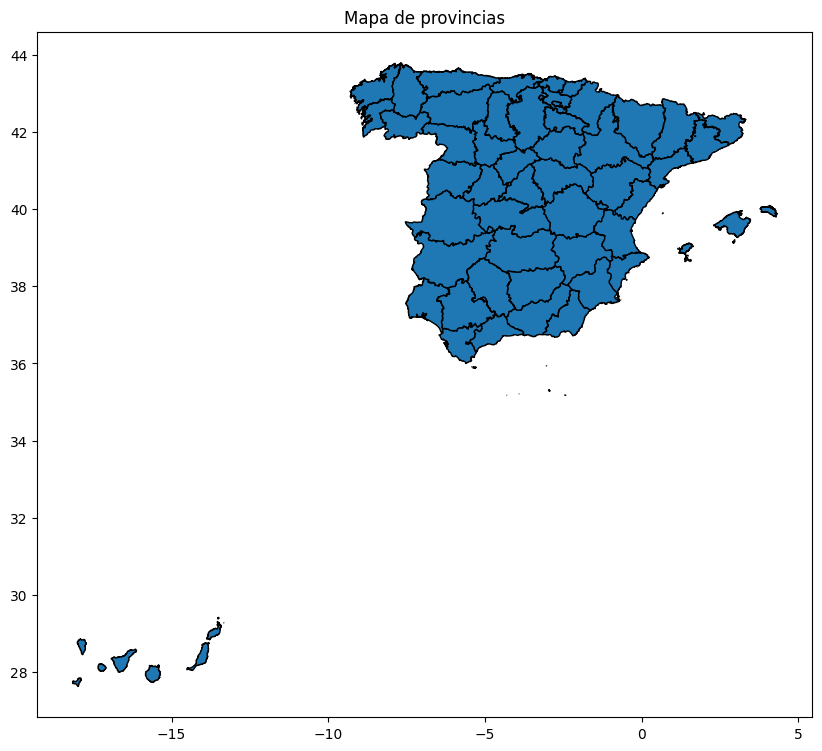

In [22]:
# Verificar si los datos de provincias son correctos

# Ver el tipo de geometría
print(gdf_p.geometry.head())

# Pintar el mapa
gdf_p.plot(edgecolor='black', figsize=(10, 10))
plt.title("Mapa de provincias")
plt.show()

In [23]:
# Mezclamos los datos de conteo con el GeoDataFrame de provincias
gdf_p = gdf_p.merge(df_grouped, left_on='Province', right_on='Province', how='left')
print(gdf_p)

               Province                                           geometry  \
0               Almería  MULTIPOLYGON (((-3.0307 35.9412, -3.0346 35.93...   
1                 Cádiz  MULTIPOLYGON (((-5.8412 36.1282, -5.8424 36.13...   
2               Córdoba  MULTIPOLYGON (((-4.248 37.2692, -4.2631 37.260...   
3               Granada  MULTIPOLYGON (((-3.3512 36.7285, -3.3651 36.71...   
4                Huelva  MULTIPOLYGON (((-6.3422 36.8031, -6.3444 36.79...   
5                  Jaén  MULTIPOLYGON (((-4.0309 37.4433, -4.0404 37.45...   
6                Málaga  MULTIPOLYGON (((-5.3199 36.3251, -5.3229 36.33...   
7               Sevilla  MULTIPOLYGON (((-6.2085 36.8934, -6.2294 36.89...   
8                Huesca  MULTIPOLYGON (((-0.0257 41.3921, -0.0241 41.39...   
9                Teruel  MULTIPOLYGON (((-0.8299 39.9068, -0.8045 39.89...   
10             Zaragoza  MULTIPOLYGON (((-1.654 40.969, -1.657 40.9694,...   
11            Cantabria  MULTIPOLYGON (((-3.9363 42.9081, -3.937

In [24]:
gdf_p = gdf_p.fillna(0) 
gdf_p['Count'] = gdf_p['Count'].astype(int)
print(gdf_p)	

               Province                                           geometry  \
0               Almería  MULTIPOLYGON (((-3.0307 35.9412, -3.0346 35.93...   
1                 Cádiz  MULTIPOLYGON (((-5.8412 36.1282, -5.8424 36.13...   
2               Córdoba  MULTIPOLYGON (((-4.248 37.2692, -4.2631 37.260...   
3               Granada  MULTIPOLYGON (((-3.3512 36.7285, -3.3651 36.71...   
4                Huelva  MULTIPOLYGON (((-6.3422 36.8031, -6.3444 36.79...   
5                  Jaén  MULTIPOLYGON (((-4.0309 37.4433, -4.0404 37.45...   
6                Málaga  MULTIPOLYGON (((-5.3199 36.3251, -5.3229 36.33...   
7               Sevilla  MULTIPOLYGON (((-6.2085 36.8934, -6.2294 36.89...   
8                Huesca  MULTIPOLYGON (((-0.0257 41.3921, -0.0241 41.39...   
9                Teruel  MULTIPOLYGON (((-0.8299 39.9068, -0.8045 39.89...   
10             Zaragoza  MULTIPOLYGON (((-1.654 40.969, -1.657 40.9694,...   
11            Cantabria  MULTIPOLYGON (((-3.9363 42.9081, -3.937

In [25]:
# Crear matriz de pesos espaciales

w = Queen.from_dataframe(gdf_p)
w.transform = 'r'  # Normalizar

print(w)

('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')


C:\Users\alexg\AppData\Local\Temp\ipykernel_22540\2517633441.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf_p)
c:\Users\alexg\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 5 islands with ids: 30, 31, 43, 44, 45.
  W.__init__(self, neighbors, ids=ids, **kw)


In [26]:
#Calcular Getis-Ord Gi*
g = G_Local(gdf_p['Count'], w)

#Añadir resultados al GeoDataFrame
gdf_p['GiZScore'] = g.Zs
gdf_p['pvalue'] = g.p_sim
gdf_p['significant'] = g.p_sim < 0.05

c:\Users\alexg\AppData\Local\Programs\Python\Python312\Lib\site-packages\esda\getisord.py:527: RuntimeWarning: invalid value encountered in divide
  z_scores = (statistic - expected_value) / np.sqrt(expected_variance)
c:\Users\alexg\AppData\Local\Programs\Python\Python312\Lib\site-packages\esda\getisord.py:450: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Gs - self.EG_sim) / self.seG_sim


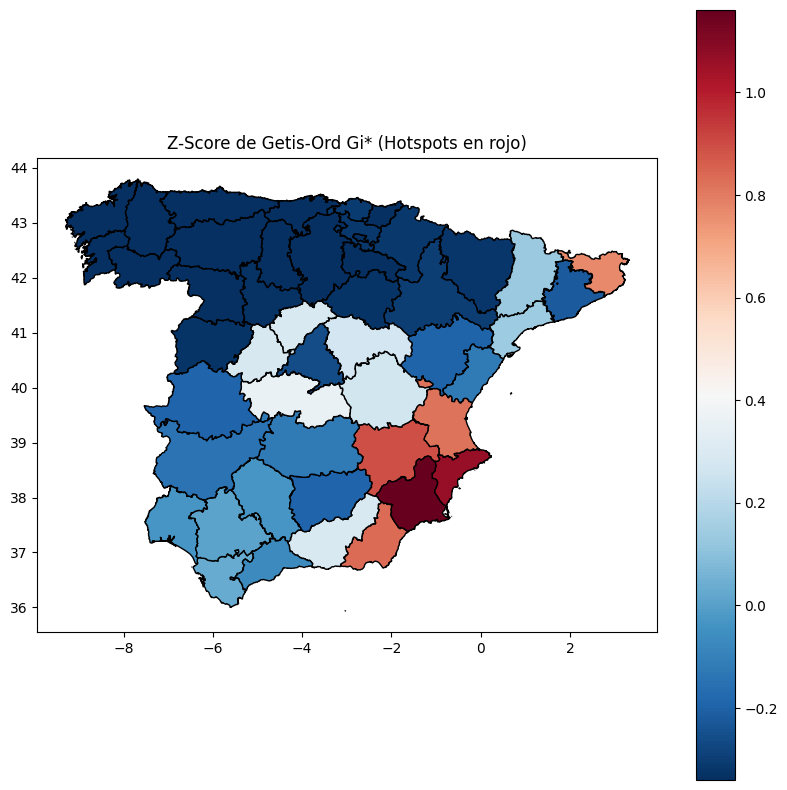

In [27]:
gdf_p.plot(column='GiZScore', cmap='RdBu_r', legend=True, edgecolor='black', figsize=(10, 10))
plt.title("Z-Score de Getis-Ord Gi* (Hotspots en rojo)")
plt.show()

#### Forma 2: Aplicar GetisOrd pero entre codigos postales de una misma provincia

- En este caso se va aplicando GetisOrd entre los codigos postales de una misma provincia

In [28]:
gdf_cp = gpd.read_file("../backend/data/codigos_postales.shp")
print(gdf_cp.head())
print(gdf_cp.columns)

         ID_CP COD_POSTAL    ALTA_DB  CODIGO_INE  \
0  10010000001      01193 2015-07-09        1001   
1  10010000002      01240 2015-07-09        1001   
2  10020000001      01468 2015-07-09        1002   
3  10020000002      01470 2015-07-09        1002   
4  10020000003      01468 2015-07-09        1002   

                                            geometry  
0  POLYGON ((-2.5306 42.81828, -2.53061 42.81814,...  
1  POLYGON ((-2.49361 42.85699, -2.49361 42.85699...  
2  POLYGON ((-2.97525 42.93816, -2.97526 42.93815...  
3  POLYGON ((-2.91984 43.06241, -2.93543 43.06835...  
4  POLYGON ((-3.01941 43.03516, -3.01761 43.03644...  
Index(['ID_CP', 'COD_POSTAL', 'ALTA_DB', 'CODIGO_INE', 'geometry'], dtype='object')


In [29]:
gdf_cp = gdf_cp[["COD_POSTAL", "geometry"]]
gdf_cp = gdf_cp.rename(columns={"COD_POSTAL": "Postcode"})
print(gdf_cp.head())

  Postcode                                           geometry
0    01193  POLYGON ((-2.5306 42.81828, -2.53061 42.81814,...
1    01240  POLYGON ((-2.49361 42.85699, -2.49361 42.85699...
2    01468  POLYGON ((-2.97525 42.93816, -2.97526 42.93815...
3    01470  POLYGON ((-2.91984 43.06241, -2.93543 43.06835...
4    01468  POLYGON ((-3.01941 43.03516, -3.01761 43.03644...


In [30]:
gdf_cp['centroid'] = gdf_cp.geometry.centroid
print(gdf_cp.head())

  Postcode                                           geometry  \
0    01193  POLYGON ((-2.5306 42.81828, -2.53061 42.81814,...   
1    01240  POLYGON ((-2.49361 42.85699, -2.49361 42.85699...   
2    01468  POLYGON ((-2.97525 42.93816, -2.97526 42.93815...   
3    01470  POLYGON ((-2.91984 43.06241, -2.93543 43.06835...   
4    01468  POLYGON ((-3.01941 43.03516, -3.01761 43.03644...   

                    centroid  
0  POINT (-2.53912 42.80242)  
1  POINT (-2.50338 42.83663)  
2  POINT (-2.99426 42.96974)  
3  POINT (-2.97691 43.06611)  
4  POINT (-2.98971 43.02679)  


In [31]:
gdf_cp['Province'] = gdf_cp['Postcode'].str[:2].map(codigos_postales_provincias)
print(gdf_cp.head())

  Postcode                                           geometry  \
0    01193  POLYGON ((-2.5306 42.81828, -2.53061 42.81814,...   
1    01240  POLYGON ((-2.49361 42.85699, -2.49361 42.85699...   
2    01468  POLYGON ((-2.97525 42.93816, -2.97526 42.93815...   
3    01470  POLYGON ((-2.91984 43.06241, -2.93543 43.06835...   
4    01468  POLYGON ((-3.01941 43.03516, -3.01761 43.03644...   

                    centroid Province  
0  POINT (-2.53912 42.80242)    Álava  
1  POINT (-2.50338 42.83663)    Álava  
2  POINT (-2.99426 42.96974)    Álava  
3  POINT (-2.97691 43.06611)    Álava  
4  POINT (-2.98971 43.02679)    Álava  


In [32]:
print(gdf_cp)

      Postcode                                           geometry  \
0        01193  POLYGON ((-2.5306 42.81828, -2.53061 42.81814,...   
1        01240  POLYGON ((-2.49361 42.85699, -2.49361 42.85699...   
2        01468  POLYGON ((-2.97525 42.93816, -2.97526 42.93815...   
3        01470  POLYGON ((-2.91984 43.06241, -2.93543 43.06835...   
4        01468  POLYGON ((-3.01941 43.03516, -3.01761 43.03644...   
...        ...                                                ...   
16127    46900  POLYGON ((-0.55474 39.42881, -0.54843 39.42184...   
16128    46370  POLYGON ((-0.59122 39.47843, -0.59123 39.47839...   
16129    46370  POLYGON ((-0.61698 39.44276, -0.61697 39.44274...   
16130    46143  POLYGON ((-1.26137 40.0947, -1.25979 40.0948, ...   
16131    46142  POLYGON ((-1.26923 40.09833, -1.27207 40.10147...   

                        centroid  Province  
0      POINT (-2.53912 42.80242)     Álava  
1      POINT (-2.50338 42.83663)     Álava  
2      POINT (-2.99426 42.96974)    

In [33]:
gdf_cp = gdf_cp.dropna(subset=['Province'], how='any')
print(gdf_cp.head())

  Postcode                                           geometry  \
0    01193  POLYGON ((-2.5306 42.81828, -2.53061 42.81814,...   
1    01240  POLYGON ((-2.49361 42.85699, -2.49361 42.85699...   
2    01468  POLYGON ((-2.97525 42.93816, -2.97526 42.93815...   
3    01470  POLYGON ((-2.91984 43.06241, -2.93543 43.06835...   
4    01468  POLYGON ((-3.01941 43.03516, -3.01761 43.03644...   

                    centroid Province  
0  POINT (-2.53912 42.80242)    Álava  
1  POINT (-2.50338 42.83663)    Álava  
2  POINT (-2.99426 42.96974)    Álava  
3  POINT (-2.97691 43.06611)    Álava  
4  POINT (-2.98971 43.02679)    Álava  


In [34]:
import os
os.makedirs("mapas_provincias", exist_ok=True)

In [35]:
print(gdf_cp.crs)
gdf_cp = gdf_cp.set_crs("EPSG:4326")
print(gdf_cp.crs)

None
EPSG:4326


In [ ]:
for prov in df['Province'].unique():
    print(f"Procesando {prov}...")

    # Códigos postales (polígonos) de la provincia
    gdf_prov = gdf_cp[gdf_cp['Province'] == prov].copy()

    # Casos positivos de la provincia
    df_prov = df[df['Province'] == prov].copy()

    # Contamos los casos por código postal
    case_counts = df_prov.groupby('Postcode').size().reset_index(name='CaseCount')

    # Unimos con los polígonos
    merged = gdf_prov.merge(case_counts, on='Postcode', how='left')
    merged['CaseCount'] = merged['CaseCount'].fillna(0)

    # Solo los que tienen al menos 1 caso
    active = merged[merged['CaseCount'] > 0].copy()

    # Saltar si hay muy pocos para aplicar Getis-Ord
    if len(active) < 6:
        print(f"❌ Saltando {prov}: pocos códigos postales con casos")
        continue

    # Obtener coordenadas desde centroides
    coords = [(pt.x, pt.y) for pt in active['centroid']]

    # Matriz de pesos espaciales con K vecinos
    w = KNN.from_array(coords, k=5)
    w.transform = 'r'

    # Calcular estadística Getis-Ord Gi*
    g = G_Local(active['CaseCount'], w)
    active['GiZScore'] = g.Zs
    active['pvalue'] = g.p_sim
    active['significant'] = g.p_sim < 0.05

    # Fusionar resultados con todo el GeoDataFrame
    final = merged.merge(active[['Postcode', 'GiZScore', 'significant']], on='Postcode', how='left')

    # Mapa
    ax = final.plot(
        column='GiZScore',
        cmap='RdBu_r',
        edgecolor='black',
        legend=True,
        figsize=(8, 8),
        missing_kwds={
            "color": "lightgrey",
            "label": "Sin casos"
        }
    )
    plt.title(f"Getis-Ord Gi* en {prov} (por código postal)")
    plt.axis('off')
    plt.savefig(f"mapas_provincias/getisord_{prov}.png")
    plt.close()

    print(f"✅ Mapa guardado: mapas_provincias/getisord_{prov}.png")

Procesando Madrid...
✅ Mapa guardado: getisord_por_codpostal/getisord_Madrid.png
Procesando Barcelona...
✅ Mapa guardado: getisord_por_codpostal/getisord_Barcelona.png
Procesando Tarragona...
❌ Saltando Tarragona: pocos códigos postales con casos
Procesando Guadalajara...
❌ Saltando Guadalajara: pocos códigos postales con casos
Procesando Toledo...
❌ Saltando Toledo: pocos códigos postales con casos
Procesando Islas Baleares...
✅ Mapa guardado: getisord_por_codpostal/getisord_Islas Baleares.png
Procesando Murcia...
✅ Mapa guardado: getisord_por_codpostal/getisord_Murcia.png
Procesando Alicante...
✅ Mapa guardado: getisord_por_codpostal/getisord_Alicante.png
Procesando Jaén...
❌ Saltando Jaén: pocos códigos postales con casos
Procesando Valencia...


c:\Users\alexg\AppData\Local\Programs\Python\Python312\Lib\site-packages\esda\getisord.py:527: RuntimeWarning: invalid value encountered in divide
  z_scores = (statistic - expected_value) / np.sqrt(expected_variance)
c:\Users\alexg\AppData\Local\Programs\Python\Python312\Lib\site-packages\esda\getisord.py:450: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Gs - self.EG_sim) / self.seG_sim


✅ Mapa guardado: getisord_por_codpostal/getisord_Valencia.png
Procesando Guipúzcoa...
❌ Saltando Guipúzcoa: pocos códigos postales con casos
Procesando Ávila...
❌ Saltando Ávila: pocos códigos postales con casos
Procesando Córdoba...


c:\Users\alexg\AppData\Local\Programs\Python\Python312\Lib\site-packages\esda\getisord.py:527: RuntimeWarning: invalid value encountered in divide
  z_scores = (statistic - expected_value) / np.sqrt(expected_variance)


✅ Mapa guardado: getisord_por_codpostal/getisord_Córdoba.png
Procesando Sevilla...


c:\Users\alexg\AppData\Local\Programs\Python\Python312\Lib\site-packages\esda\getisord.py:527: RuntimeWarning: invalid value encountered in divide
  z_scores = (statistic - expected_value) / np.sqrt(expected_variance)
c:\Users\alexg\AppData\Local\Programs\Python\Python312\Lib\site-packages\esda\getisord.py:450: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Gs - self.EG_sim) / self.seG_sim


✅ Mapa guardado: getisord_por_codpostal/getisord_Sevilla.png
Procesando Lleida...
❌ Saltando Lleida: pocos códigos postales con casos
Procesando Málaga...
❌ Saltando Málaga: pocos códigos postales con casos
Procesando Badajoz...


c:\Users\alexg\AppData\Local\Programs\Python\Python312\Lib\site-packages\esda\getisord.py:450: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Gs - self.EG_sim) / self.seG_sim


✅ Mapa guardado: getisord_por_codpostal/getisord_Badajoz.png
Procesando Castellón...
❌ Saltando Castellón: pocos códigos postales con casos
